# MLDM GROUP COURSEWORK (COMM055) - NIMISHA RAJESH 6829882

# 1) Introduction

-This coursework's aim is to evaluate the efficiency of numerous algorithms for machine learning by applying them to a real-world dataset.<br>
-The "Bank Marketing" dataset, featuring details on a Portuguese banking institution's direct marketing attempts (phone calls), was utilised for this homework. <br>
-Forecasting if a customer will sign up for a term deposit is the purpose (variable y).

# 2) Aim

-To preprocess the dataset and prepare it for machine learning models. <br>
-To implement and evaluate multiple machine learning algorithms.<br>
-To compare the performance of these algorithms using various metrics such as accuracy, precision, recall, F1-score, and confusion matrices.<br>
-To visualize the results and draw meaningful conclusions.<br>

## 3) Importing Libraries

In [1]:
#Import required libraries

# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from prettytable import PrettyTable
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#Import required libraries
from tabulate import tabulate
from imblearn.over_sampling import SMOTE

## 4) Importing data 

Here we are importing the banking dataset and analysing it using simple functions.

In [4]:
#Import the banking dataset

df=pd.read_csv("bank-additional-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#Get the columns present in dataset

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
#To provides a concise summary of the DataFrame

df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [7]:
#To provide descriptive statistics for the DataFrame

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
#To get the dimensions of the DataFrame

df.shape

(41188, 21)

In [9]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display unique values and their counts for each categorical column
for column in categorical_columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


Column: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


Column: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


Column: default
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


Column: housing
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


Column: loan
loan
no         33950
yes         6248
unknown   

# 5) Exploratory Data Analysis

## 5.1) Bar Plot : Visualizing the distribution of values in each categorical column

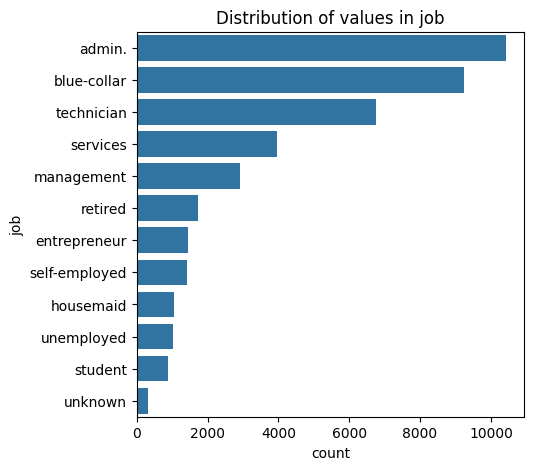

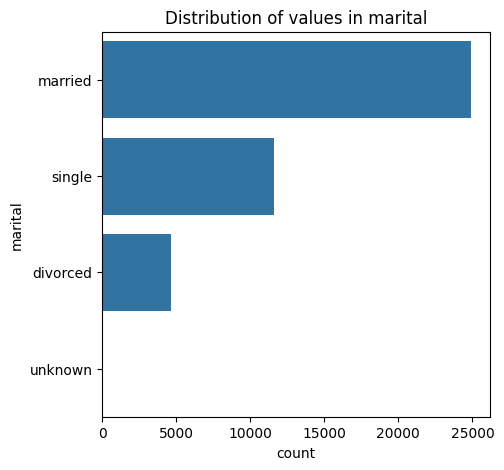

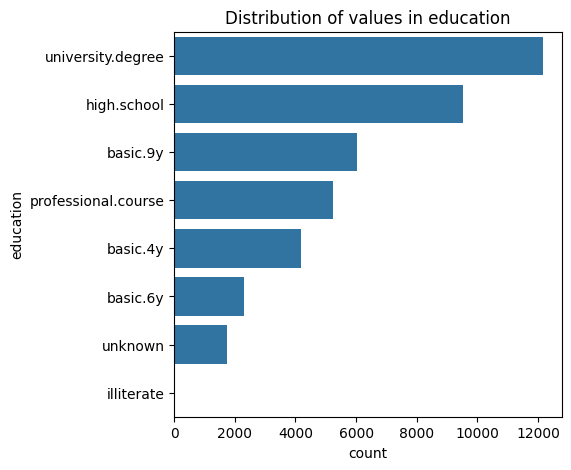

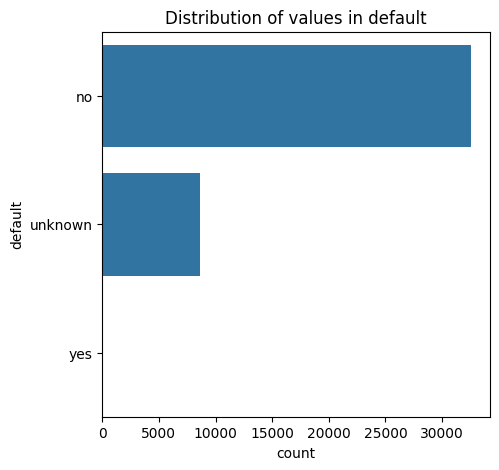

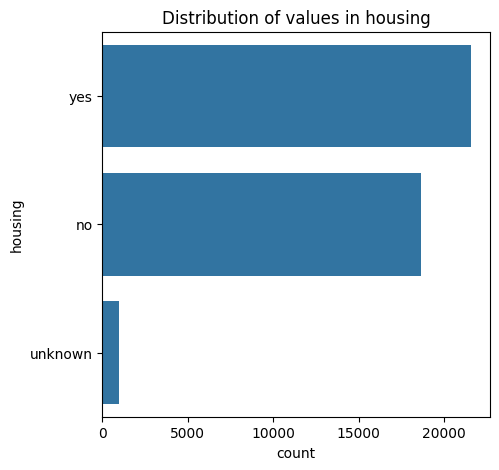

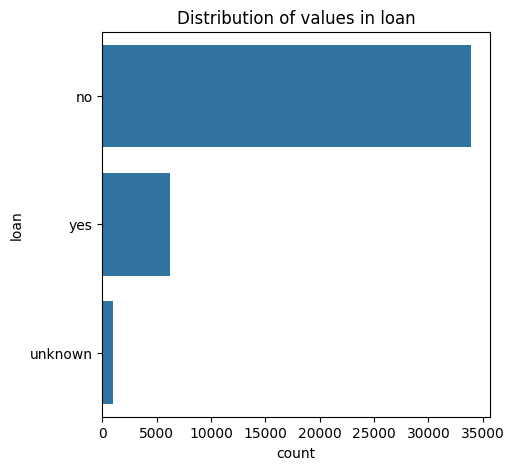

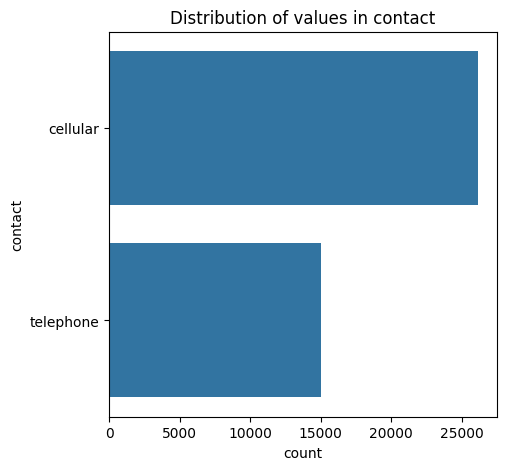

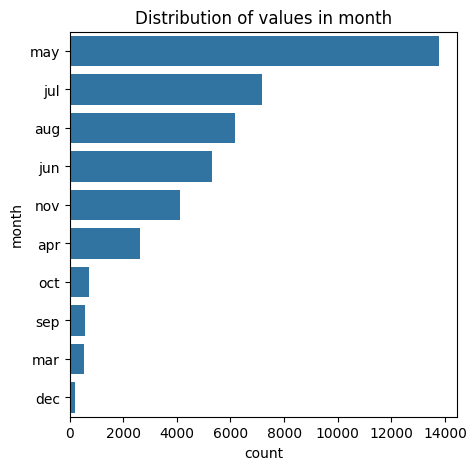

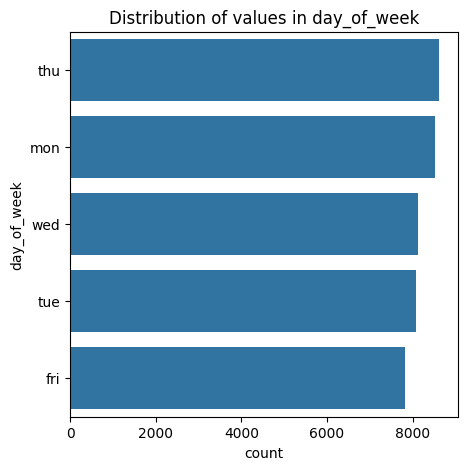

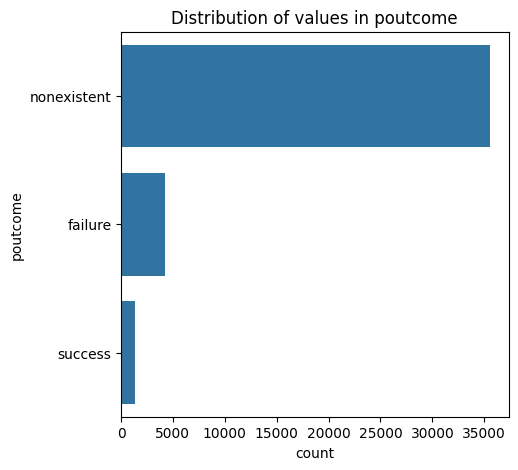

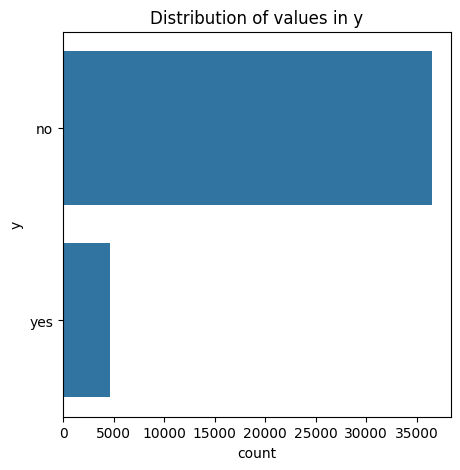

In [10]:
for column in categorical_columns:
    plt.figure(figsize=(5, 5))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of values in {column}')
    plt.show()

In [11]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns


# Display the count of 'unknown' values for each categorical column
for column in categorical_columns:
    unknown_count = df[column].value_counts().get('unknown', 0)
    print(f"Column: {column}, 'unknown' count: {unknown_count}")

Column: job, 'unknown' count: 330
Column: marital, 'unknown' count: 80
Column: education, 'unknown' count: 1731
Column: default, 'unknown' count: 8597
Column: housing, 'unknown' count: 990
Column: loan, 'unknown' count: 990
Column: contact, 'unknown' count: 0
Column: month, 'unknown' count: 0
Column: day_of_week, 'unknown' count: 0
Column: poutcome, 'unknown' count: 0
Column: y, 'unknown' count: 0


## 5.2) Bar Plot : Count of Unknown

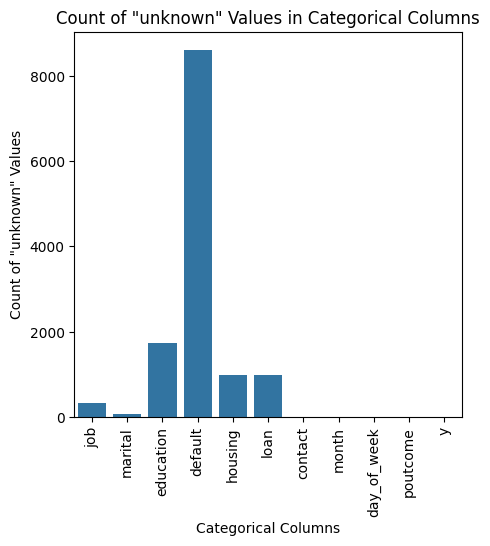

In [12]:
# Visualize the 'unknown' counts using bar plots

unknown_counts = {column: df[column].value_counts().get('unknown', 0) for column in categorical_columns}
plt.figure(figsize=(5, 5))
sns.barplot(x=list(unknown_counts.keys()), y=list(unknown_counts.values()))
plt.xticks(rotation=90)
plt.title('Count of "unknown" Values in Categorical Columns')
plt.xlabel('Categorical Columns')
plt.ylabel('Count of "unknown" Values')
plt.show()

In [13]:
#Identify categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the percentage of 'unknown' values for each categorical column

total_rows = len(df)
unknown_percentages = {}

for column in categorical_columns:
    unknown_count = df[column].value_counts().get('unknown', 0)
    unknown_percentage = (unknown_count / total_rows) * 100
    unknown_percentages[column] = unknown_percentage
    print(f"Column: {column}, 'unknown' percentage: {unknown_percentage:.2f}%")

Column: job, 'unknown' percentage: 0.80%
Column: marital, 'unknown' percentage: 0.19%
Column: education, 'unknown' percentage: 4.20%
Column: default, 'unknown' percentage: 20.87%
Column: housing, 'unknown' percentage: 2.40%
Column: loan, 'unknown' percentage: 2.40%
Column: contact, 'unknown' percentage: 0.00%
Column: month, 'unknown' percentage: 0.00%
Column: day_of_week, 'unknown' percentage: 0.00%
Column: poutcome, 'unknown' percentage: 0.00%
Column: y, 'unknown' percentage: 0.00%


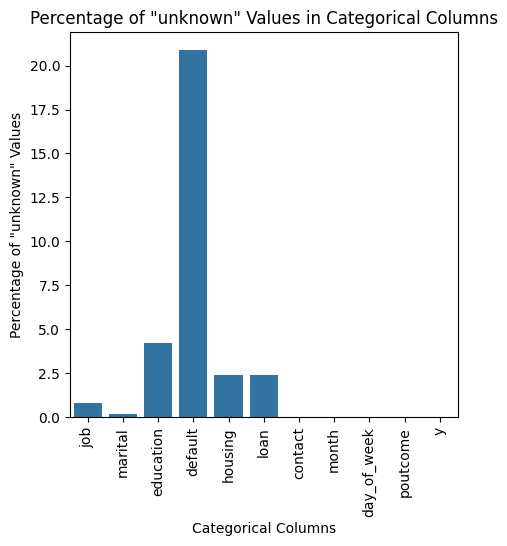

In [14]:
# Visualize the 'unknown' percentages using bar plots

plt.figure(figsize=(5, 5))
sns.barplot(x=list(unknown_percentages.keys()), y=list(unknown_percentages.values()))
plt.xticks(rotation=90)
plt.title('Percentage of "unknown" Values in Categorical Columns')
plt.xlabel('Categorical Columns')
plt.ylabel('Percentage of "unknown" Values')
plt.show()

In [15]:
print(df['y'].value_counts())

y
no     36548
yes     4640
Name: count, dtype: int64


## 5.3) PairPlot : Distribution of Columns

In [ ]:
# Selecting a subset of columns for the pair plot
# You can select the columns you are interested in
subset_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

# Converting the target variable 'y' to numeric for better visualization
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Set the style and context for the plot
sns.set(style="whitegrid")
sns.set_context("talk", font_scale=1.2)

# Creating the pair plot with green and purple colors
pairplot = sns.pairplot(df[subset_columns], hue='y', palette={0: 'green', 1: 'purple'})

# Adjusting the titles and labels for better visibility
for ax in pairplot.axes.flatten():
    ax.set_title(ax.get_title(), fontsize=16)
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

## 5.4) Scatterplot : Distribution of Columns against Target Variable

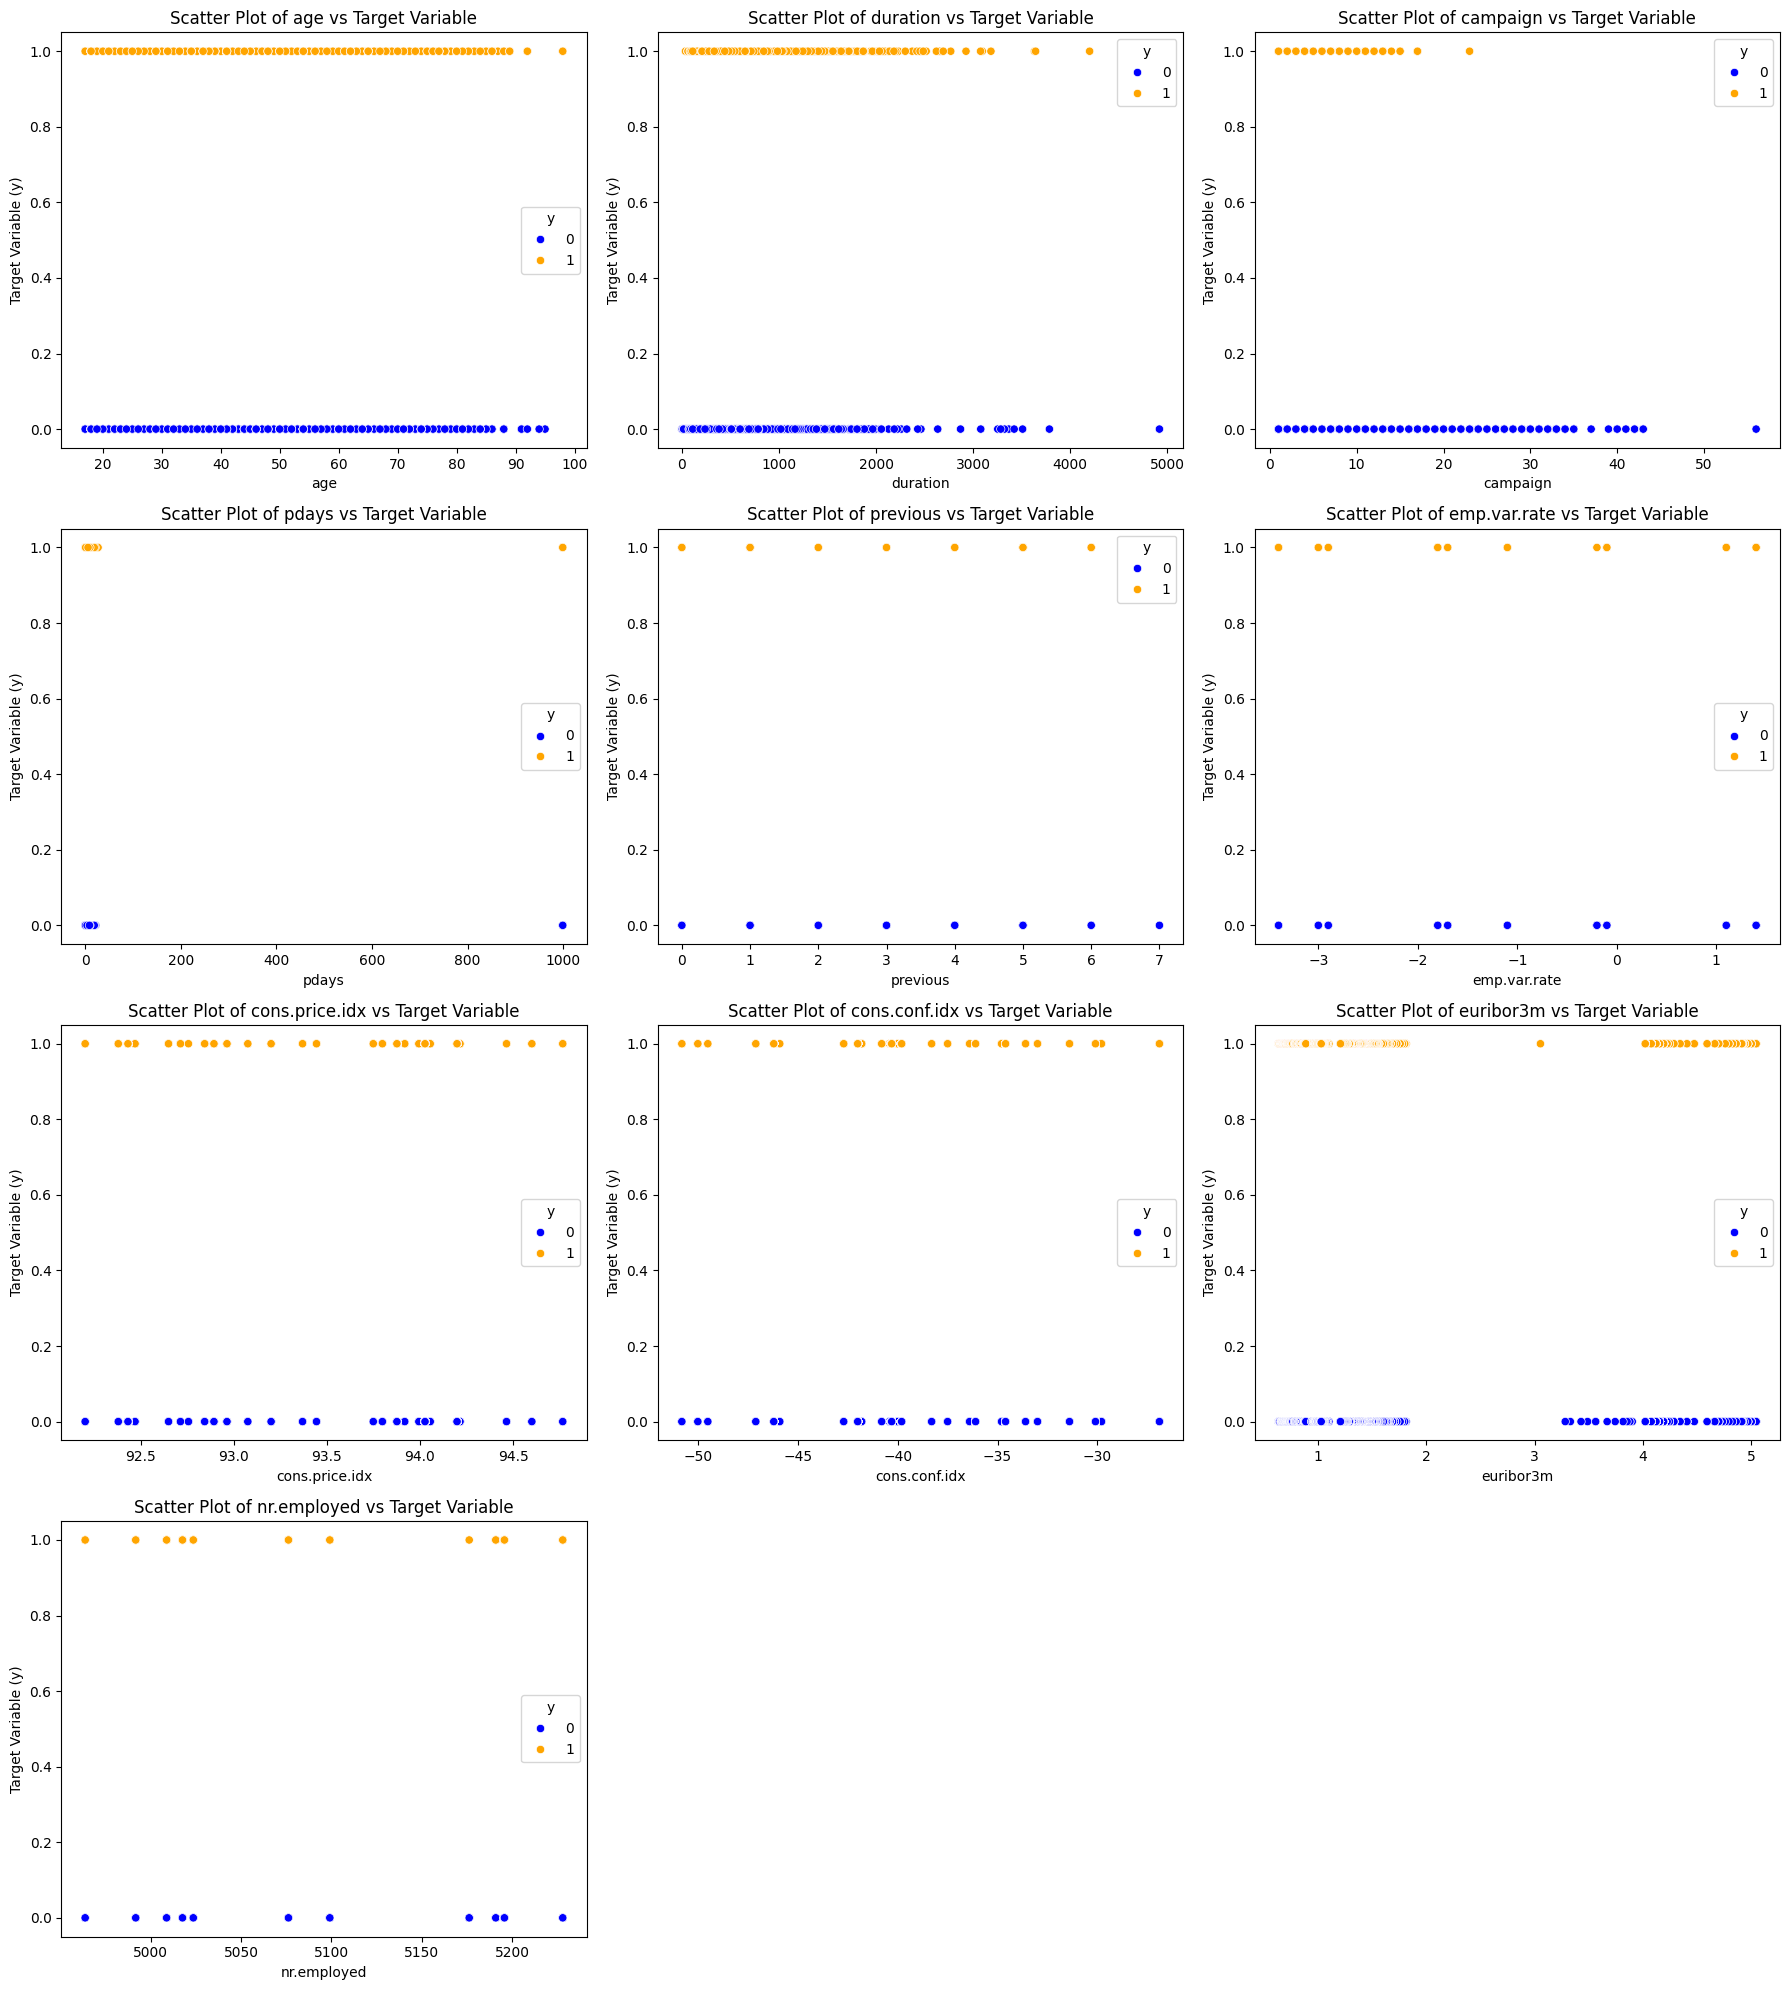

In [16]:
# Converting the target variable 'y' to numeric for better visualization
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Selecting numerical columns and excluding the target variable 'y'
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns = numerical_columns.drop('y')

# Define the number of columns for the subplot grid
n_cols = 3
n_rows = (len(numerical_columns) - 1) // n_cols + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create scatter plots
for i, column in enumerate(numerical_columns):
    sns.scatterplot(data=df, x=column, y='y', hue='y', palette={0: 'blue', 1: 'orange'}, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {column} vs Target Variable')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Target Variable (y)')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 6) Data Preprocessing

## 6.1) Drop Unwanted Columns

In [17]:
# Get the shape of the dataset before dropping rows
shape_before = df.shape 

# Drop rows where 'unknown' is present in the specified columns
print('Shape before drop',shape_before)

# Specify the columns to check for 'unknown' values
columns_to_check = ['job','marital','education','housing','loan'] 
df = df[~df[columns_to_check].isin(['unknown']).any(axis=1)] 

# Get the shape of the dataset after dropping rows
shape_after = df.shape
print('Shape after drop',shape_after)

Shape before drop (41188, 21)
Shape after drop (38245, 21)


In [18]:
print(df['y'].value_counts())

y
0    33987
1     4258
Name: count, dtype: int64


## 6.2) Conversion of Categorical Columns to  Numerical Columns

In [19]:
print(df['y'].value_counts())

y
0    33987
1     4258
Name: count, dtype: int64


In [20]:
# Identify the categorical columns based on provided attribute information
categorical_columns = [
    'job', 'marital', 'education', 'default', 
    'housing', 'loan', 'contact', 'month', 
    'day_of_week', 'poutcome', 'y'
]

# Initialize a dictionary to hold the mappings
mappings = {}

# Convert categorical columns to numerical using pandas' factorize
for column in categorical_columns:
    df[column], unique = pd.factorize(df[column])
    mappings[column] = dict(enumerate(unique))

# Display the DataFrame and the mappings dictionary
print("Converted DataFrame:")
print(df.head())


Converted DataFrame:
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    0        0          0        0        0     0        0      0   
1   57    1        0          1        1        0     0        0      0   
2   37    1        0          1        0        1     0        0      0   
3   40    2        0          2        0        0     0        0      0   
4   56    1        0          1        0        0     1        0      0   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         1    999         0         0           1.1   
1            0  ...         1    999         0         0           1.1   
2            0  ...         1    999         0         0           1.1   
3            0  ...         1    999         0         0           1.1   
4            0  ...         1    999         0         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994    

C:\Users\Nimisha Rajesh\AppData\Local\Temp\ipykernel_49444\496798430.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column], unique = pd.factorize(df[column])
C:\Users\Nimisha Rajesh\AppData\Local\Temp\ipykernel_49444\496798430.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column], unique = pd.factorize(df[column])
C:\Users\Nimisha Rajesh\AppData\Local\Temp\ipykernel_49444\496798430.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [21]:
#To understand the mapping of categorical column classes to numerical values

print("\nDictionary of Mappings:")
for key, value in mappings.items():
    print(f"{key}: {value}")


Dictionary of Mappings:
job: {0: 'housemaid', 1: 'services', 2: 'admin.', 3: 'technician', 4: 'blue-collar', 5: 'retired', 6: 'management', 7: 'unemployed', 8: 'self-employed', 9: 'entrepreneur', 10: 'student'}
marital: {0: 'married', 1: 'single', 2: 'divorced'}
education: {0: 'basic.4y', 1: 'high.school', 2: 'basic.6y', 3: 'basic.9y', 4: 'professional.course', 5: 'university.degree', 6: 'illiterate'}
default: {0: 'no', 1: 'unknown', 2: 'yes'}
housing: {0: 'no', 1: 'yes'}
loan: {0: 'no', 1: 'yes'}
contact: {0: 'telephone', 1: 'cellular'}
month: {0: 'may', 1: 'jun', 2: 'jul', 3: 'aug', 4: 'oct', 5: 'nov', 6: 'dec', 7: 'mar', 8: 'apr', 9: 'sep'}
day_of_week: {0: 'mon', 1: 'tue', 2: 'wed', 3: 'thu', 4: 'fri'}
poutcome: {0: 'nonexistent', 1: 'failure', 2: 'success'}
y: {0: 0, 1: 1}


## 6.3)  Correlation Matrix

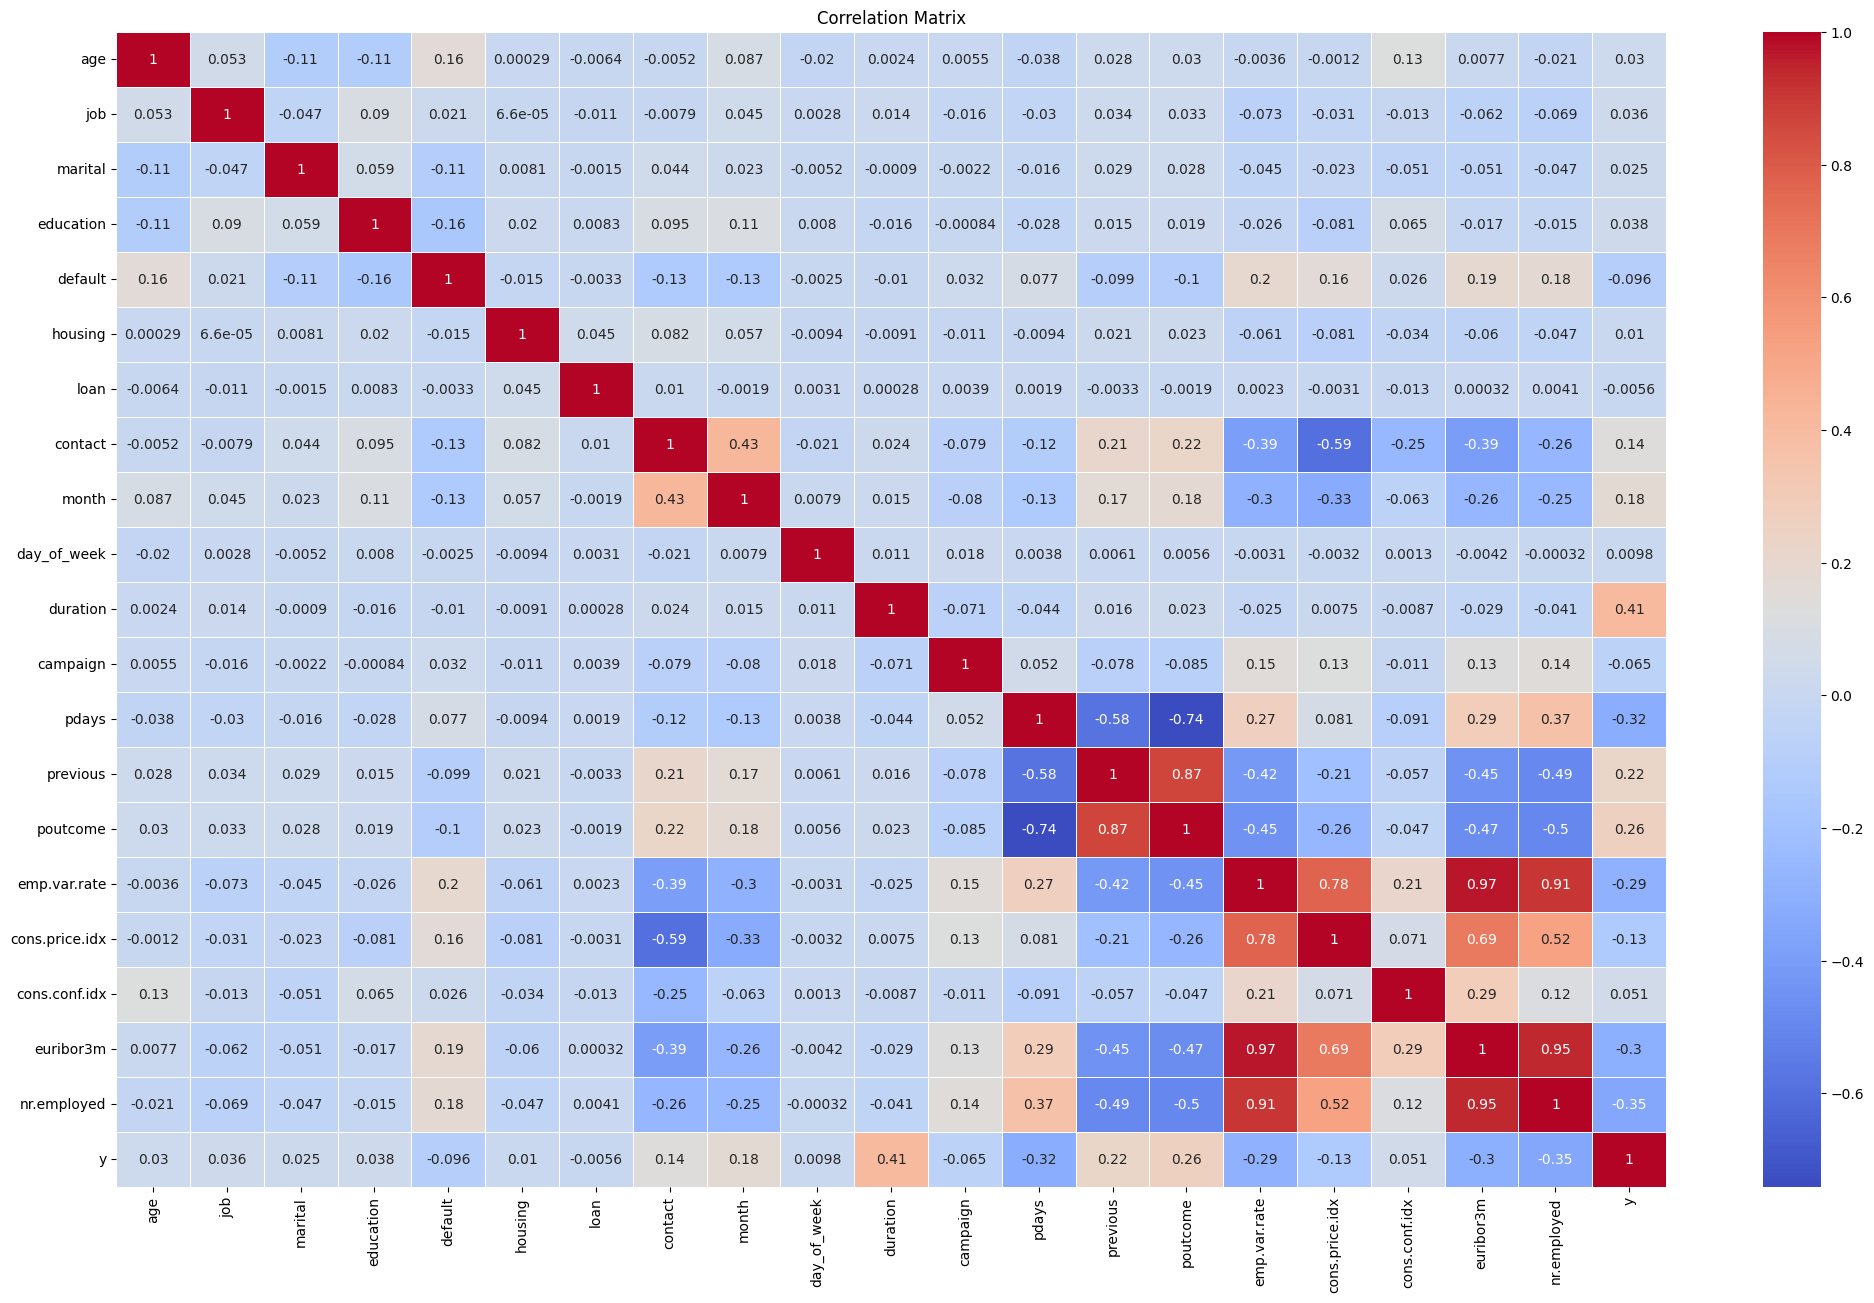

In [22]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Calculate correlation with the target variable 'y'
target_correlation = correlation_matrix['y'].abs()

# Set a threshold for low correlation
threshold = 0.05

# Identify columns to remove based on the threshold
columns_to_remove = target_correlation[target_correlation < threshold].index.tolist()
columns_to_remove = [col for col in columns_to_remove if col != 'y']

# Remove the identified columns
df.drop(columns=columns_to_remove, inplace=True)
df.drop(columns=['default'], inplace=True)

C:\Users\Nimisha Rajesh\AppData\Local\Temp\ipykernel_49444\1427309952.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_remove, inplace=True)
C:\Users\Nimisha Rajesh\AppData\Local\Temp\ipykernel_49444\1427309952.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['default'], inplace=True)


## 6.4) Outlier Check - Capping

In [26]:
print(df['y'].value_counts())

y
0    33987
1     4258
Name: count, dtype: int64


In [25]:
# Function to identify outliers

def identify_outliers(df, exclude_column):
    # Exclude the specified column
    df_excluded = df.drop(columns=[exclude_column])
    
    # Method to identify outliers using Z-score
    from scipy import stats
    z_scores = stats.zscore(df_excluded, nan_policy='omit')
    abs_z_scores = np.abs(z_scores)
    outliers = (abs_z_scores > 3).any(axis=1)
    
    # Create a DataFrame to show outliers
    outlier_df = df[outliers]
    return outlier_df

outliers = identify_outliers(df, 'y')

In [27]:
# Function to identify outliers and calculate the percentage
def calculate_outlier_percentage(df):
    outlier_percentages = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outlier_percentage = (len(outliers) / len(df)) * 100
            outlier_percentages[column] = outlier_percentage
    return outlier_percentages

# Calculate the percentage of outliers in each column
outlier_percentages = calculate_outlier_percentage(df)


# Display the outlier percentages
print("Percentage of Outliers in Each Column:")
for column, percentage in outlier_percentages.items():
    print(f"{column}: {percentage:.2f}%")


Percentage of Outliers in Each Column:
contact: 0.00%
month: 7.68%
duration: 7.19%
campaign: 5.80%
pdays: 3.57%
previous: 13.54%
poutcome: 13.54%
emp.var.rate: 0.00%
cons.price.idx: 0.00%
cons.conf.idx: 1.07%
euribor3m: 0.00%
nr.employed: 0.00%
y: 11.13%


In [28]:
# Defining the categorical columns 
columns_to_cap = ['duration', 'campaign', 'pdays', 'previous', 'month', 'cons.conf.idx', 'poutcome']

def cap_outliers(df, columns):
    df_capped = df.copy()
    
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        df_capped[column] = np.where(df_capped[column] < lower_bound, lower_bound, df_capped[column])
        df_capped[column] = np.where(df_capped[column] > upper_bound, upper_bound, df_capped[column])
        
    return df_capped

df_capped = cap_outliers(df, columns_to_cap)
df=df_capped
print(df['y'].value_counts())

y
0    33987
1     4258
Name: count, dtype: int64


# 7) Modeling

## 7.1) Train - Test Split

In [29]:
#Defining the required variables for modelling 

feature_columns = ['contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed',]


X = df[feature_columns]
y = df['y']  
 
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print("Training set distribution:")
print(y_train.value_counts())

print("Testing set distribution:")
print(y_test.value_counts())

Training set distribution:
y
0    27195
1     3401
Name: count, dtype: int64
Testing set distribution:
y
0    6792
1     857
Name: count, dtype: int64


## 7.2) Imbalance Check - SMOTE

In [31]:
# Handle class imbalance using SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## 7.3) Normalization

In [32]:
# Normalize the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  7.4) Multi-Layer Perceptron (MLP) Classifier 

1. **Model Training:** 
   - The Multi-Layer Perceptron (MLP) classifier is trained using the provided training data.
   
2. **Model Evaluation Metrics:**
   - Accuracy, precision, recall, and F1 score are computed to evaluate the performance of the MLP model.
   
3. **Classification Report:**
   - A detailed classification report is generated, including precision, recall, F1-score, and support for each class.
   
4. **Receiver Operating Characteristic (ROC) Curve:**
   - The ROC curve is plotted to visualize the trade-off between true positive rate and false positive rate.



C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


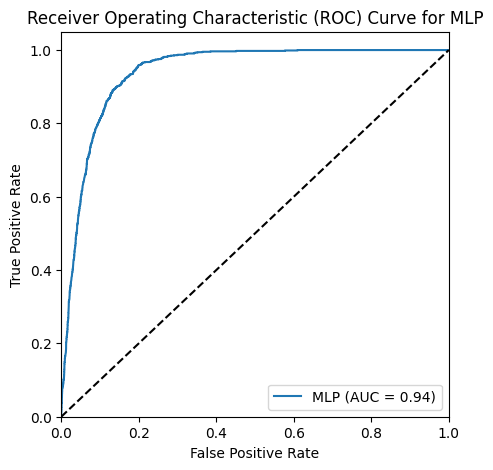

MLP Evaluation Metrics:
Accuracy: 0.8682180677212707
Precision: 0.45503275759380585
Recall: 0.8914819136522754
F1 Score: 0.6025236593059937
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      6792
           1       0.46      0.89      0.60       857

    accuracy                           0.87      7649
   macro avg       0.72      0.88      0.76      7649
weighted avg       0.93      0.87      0.89      7649



In [33]:

# Initialize MLP model
mlp_model = MLPClassifier()

# Fit the model
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Calculate evaluation metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
classification_report_mlp = classification_report(y_test, y_pred_mlp)

# Plot ROC curve
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(5, 5))
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
plt.legend(loc='lower right')
plt.show()

# Complete the code by printing the evaluation metrics and classification report
print("MLP Evaluation Metrics:")
print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1 Score:", f1_mlp)
print("Classification Report:\n", classification_report_mlp)


## 7.5) Cross-Validation and Evaluation of Multi-Layer Perceptron (MLP) Classifier

In this section, we evaluate the performance of the MLP classifier through cross-validation and various evaluation metrics.

**Data Preparation**:
- We begin by converting the training data (`X_train` and `y_train`) into pandas DataFrame format for ease of manipulation.

**Model Initialization**:
- We initialize the MLP classifier, which is a type of artificial neural network model capable of learning non-linear relationships in data.

**Cross-Validation**:
- To assess the generalization performance of the model, we employ 5-fold cross-validation, a common technique for estimating the performance of a machine learning model. This process involves dividing the dataset into five equal parts, training the model on four parts, and evaluating it on the fifth part. We repeat this process five times, each time using a different part as the test set.

**Evaluation Metrics**:
- We use accuracy as the evaluation metric during cross-validation. Accuracy measures the proportion of correctly classified instances out of all instances.

**Best Model Selection**:
- After cross-validation, we identify the model with the highest accuracy as the best model. This model demonstrates the best performance on average across the five folds.

**Model Fitting**:
- We fit the best MLP model on the entire training dataset to ensure it learns from the entire data distribution.

**Prediction and Evaluation**:
- Using the best model, we make predictions on the test set. We then compute various evaluation metrics such as confusion matrix, ROC curve, AUC (Area Under the Curve), and classification report to comprehensively assess the model's performance.

**Confusion Matrix**:
- The confusion matrix provides a tabular summary of the actual versus predicted class labels, enabling us to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives.

**ROC Curve and AUC**:
- The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different threshold values, offering insights into the trade-off between sensitivity and specificity. The AUC represents the area under the ROC curve and provides a single scalar value to summarize the model's discriminative ability.

**Classification Report**:
- For each fold in the cross-validation process, we generate a classification report containing precision, recall, F1-score, and support for each class. This report offers a detailed breakdown of the model's performance across different classes, providing valuable insights into its strengths and weaknesses.

Through this rigorous evaluation process, we gain a comprehensive understanding of the MLP classifier's performance and its ability to generalize to unseen data.


C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [0.88766317 0.89400625 0.8970399  0.90080897 0.89428204]
Best Accuracy: 0.9008089722375436


C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nimisha Rajesh\anaconda3\Li

Confusion Matrix for Best Accuracy:
 [[6533  259]
 [ 476  381]]


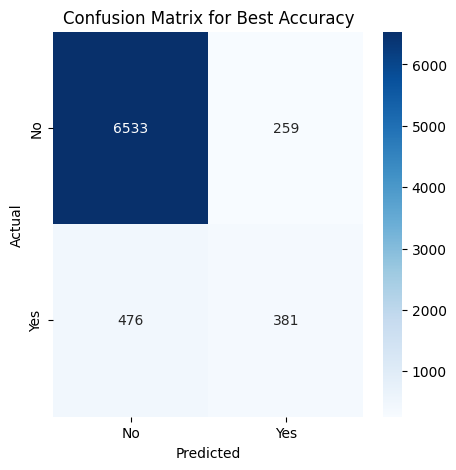

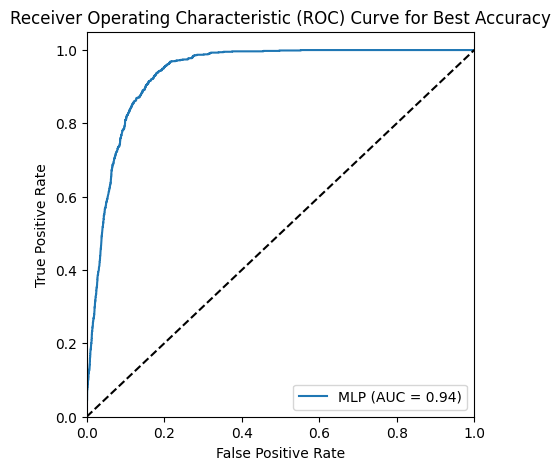

C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5439
           1       0.86      0.95      0.90      5439

    accuracy                           0.90     10878
   macro avg       0.90      0.90      0.90     10878
weighted avg       0.90      0.90      0.90     10878

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5439
           1       0.86      0.94      0.90      5439

    accuracy                           0.90     10878
   macro avg       0.90      0.90      0.90     10878
weighted avg       0.90      0.90      0.90     10878



C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5439
           1       0.86      0.94      0.90      5439

    accuracy                           0.89     10878
   macro avg       0.90      0.89      0.89     10878
weighted avg       0.90      0.89      0.89     10878



C:\Users\Nimisha Rajesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for Fold 4:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      5439
           1       0.86      0.94      0.90      5439

    accuracy                           0.89     10878
   macro avg       0.90      0.89      0.89     10878
weighted avg       0.90      0.89      0.89     10878

Classification Report for Fold 5:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5439
           1       0.85      0.95      0.89      5439

    accuracy                           0.89     10878
   macro avg       0.89      0.89      0.89     10878
weighted avg       0.89      0.89      0.89     10878



In [34]:
# Convert X_train and y_train to pandas DataFrame
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Initialize MLP model
mlp_model = MLPClassifier()

# Perform cross-validation
cv_scores = cross_val_score(mlp_model, X_train_df, y_train_df.values.ravel(), cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Find the best accuracy and corresponding model
best_accuracy_index = np.argmax(cv_scores)
best_accuracy = cv_scores[best_accuracy_index]
best_model = mlp_model

print("Best Accuracy:", best_accuracy)

# Fit the best model
best_model.fit(X_train_df, y_train_df.values.ravel())

# Perform predictions with cross-validation
y_pred_cv = cross_val_predict(best_model, X_test, y_test, cv=5)

# Print confusion matrix for the best accuracy
conf_matrix_best = confusion_matrix(y_test, y_pred_cv)
print("Confusion Matrix for Best Accuracy:\n", conf_matrix_best)

# Plot confusion matrix for the best accuracy
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Accuracy')
plt.show()

# Calculate ROC curve and AUC for the best accuracy
y_prob_best = best_model.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)

# Plot ROC curve for the best accuracy
plt.figure(figsize=(5, 5))
plt.plot(fpr_best, tpr_best, label=f'MLP (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Accuracy')
plt.legend(loc='lower right')
plt.show()

# Print classification report for every fold
cv_classification_reports = []
for fold, (train_index, test_index) in enumerate(StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train_df, y_train_df.values.ravel()), 1):
    X_train_fold, X_test_fold = X_train_df.iloc[train_index], X_train_df.iloc[test_index]
    y_train_fold, y_test_fold = y_train_df.iloc[train_index], y_train_df.iloc[test_index]
    mlp_fold = MLPClassifier()
    mlp_fold.fit(X_train_fold, y_train_fold.values.ravel())
    y_pred_fold = mlp_fold.predict(X_test_fold)
    classification_report_fold = classification_report(y_test_fold, y_pred_fold)
    cv_classification_reports.append(classification_report_fold)
    print(f"Classification Report for Fold {fold}:\n{classification_report_fold}")


### 7.6) Hyperparameter Tuning  of Multi-Layer Perceptron (MLP)

For MLP, we define a parameter grid containing different combinations of hyperparameters such as `hidden_layer_sizes` (number of neurons in each hidden layer) and `max_iter` (maximum number of iterations). We utilize `GridSearchCV` to search over this parameter grid using 5-fold cross-validation and the `roc_auc` scoring metric. The best model obtained is evaluated on the test set, and its ROC curve is plotted.

Overall, this section demonstrates how hyperparameter tuning can be performed individually for each algorithm to optimize their performance and achieve better predictive accuracy.

Best parameters for MLPClassifier: {'hidden_layer_sizes': (5,), 'max_iter': 100}
ROC AUC score for MLPClassifier: 0.918


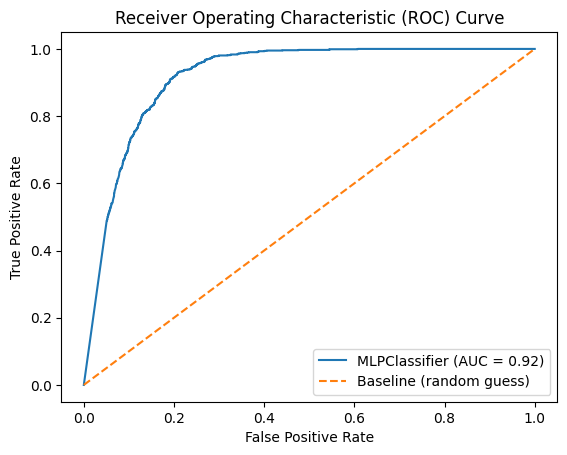

In [36]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Define parameter grid for each model
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
xgb_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
nb_param_grid = {}  # No hyperparameters to tune for Naive Bayes
mlp_param_grid = {'hidden_layer_sizes': [(5,), (10,), (100,)], 'max_iter': [100, 500, 1000]}

# Define classifiers

mlp_clf = MLPClassifier(random_state=0)

# Define the parameter grid and model pairs
models = [
   
    (mlp_clf, mlp_param_grid)
]

# Perform hyperparameter tuning and evaluate
for model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f'Best parameters for {type(model).__name__}: {grid_search.best_params_}')
    print(f'ROC AUC score for {type(model).__name__}: {auc_score:.3f}')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {auc_score:.2f})')

# Plot the ROC curve for the baseline
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
